In [1]:
llm_config={"model": "gpt-4o-mini"}

In [2]:
from autogen.coding import LocalCommandLineCodeExecutor

In [3]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

In [4]:
from autogen import ConversableAgent, AssistantAgent

In [5]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [6]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [7]:
code_writer_agent_system_message = code_writer_agent.system_message

In [8]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [9]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Write a code to retrieve data from https://movie.douban.com/top250"\
"Make sure the code is in markdown code block and save as json file,"\
" and the name of this file is dou.json"""

In [ ]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-10-12. Write a code to retrieve data from https://movie.douban.com/top250Make sure the code is in markdown code block and save as json file, and the name of this file is dou.json

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

I will write a Python script to retrieve data from the specified URL (https://movie.douban.com/top250) and save the extracted information into a JSON file named `dou.json`. The script will use the `requests` library to fetch the data and `BeautifulSoup` to parse the HTML content. 

Let's proceed with the following steps:

1. Fetch the content from the URL.
2. Parse the HTML to extract the movie data.
3. Save the extracted data in a JSON file.

Here is the complete Python code:

```python
# filename: fetch_movies.py

import requests
from bs4 import BeautifulSoup
import json

# Step 1: Fetch the content from the URL
url = 'https:

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  HTTPError: 418 Client Error:  for url: https://movie.douban.com/top250


code_executor_agent (to code_writer_agent):

HTTPError: 418 Client Error:  for url: https://movie.douban.com/top250

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The HTTP 418 error indicates that the server may be reacting to the request in a way that suggests it considers the request to be improperly formed or is enforcing some kind of rate limiting, like blocking automated scripts.

To address this, we can try making the request look more like it's coming from a web browser by adding some HTTP headers such as 'User-Agent'. Let's modify the code accordingly.

Here is the revised version of the Python script:

```python
# filename: fetch_movies.py

import requests
from bs4 import BeautifulSoup
import json

# Step 1: Fetch the content from the URL with headers
url = 'https://movie.douban.com/top250'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Geck

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  AttributeError: 'NoneType' object has no attribute 'text'


code_executor_agent (to code_writer_agent):

AttributeError: 'NoneType' object has no attribute 'text'

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

The `AttributeError: 'NoneType' object has no attribute 'text'` suggests that the parser did not find an expected element in the HTML structure of the page, which can happen if the page layout has changed or if the selectors used to find elements are not matching any parts of the content.

Let’s inspect the HTML structure of the page and adjust the selectors accordingly. I will modify the code to include proper error handling and ensure that the selectors match the correct elements.

Here is the updated code:

```python
# filename: fetch_movies.py

import requests
from bs4 import BeautifulSoup
import json

# Step 1: Fetch the content from the URL with headers
url = 'https://movie.douban.com/top250'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; W

In [11]:
import requests
from bs4 import BeautifulSoup
import json

# Step 1: Fetch the content from the URL
url = 'https://movie.douban.com/top250'
response = requests.get(url)
response.raise_for_status()  # Check for HTTP errors

# Step 2: Parse the HTML to extract movie data
soup = BeautifulSoup(response.text, 'html.parser')
movies = []
for item in soup.select('.item'):
    title = item.select_one('.title').text
    rank = item.select_one('.rank').text.strip()
    movies.append({'rank': rank, 'title': title})

# Step 3: Save the extracted data to a JSON file
with open('dou.json', 'w', encoding='utf-8') as json_file:
    json.dump(movies, json_file, ensure_ascii=False, indent=4)

print("Data has been successfully retrieved and saved to dou.json.")

HTTPError: 418 Client Error:  for url: https://movie.douban.com/top250

In [13]:
import requests
from bs4 import BeautifulSoup
import json

# Step 1: Fetch the content from the URL with headers
url = 'https://movie.douban.com/top250'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
}
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for HTTP errors

# Step 2: Parse the HTML to extract movie data
soup = BeautifulSoup(response.text, 'html.parser')
movies = []
for item in soup.select('.item'):
    title = item.select_one('.title').text
    rank = item.select_one('.rank').text.strip()
    movies.append({'rank': rank, 'title': title})

# Step 3: Save the extracted data to a JSON file
with open('dou.json', 'w', encoding='utf-8') as json_file:
    json.dump(movies, json_file, ensure_ascii=False, indent=4)

print("Data has been successfully retrieved and saved to dou.json.")

AttributeError: 'NoneType' object has no attribute 'text'

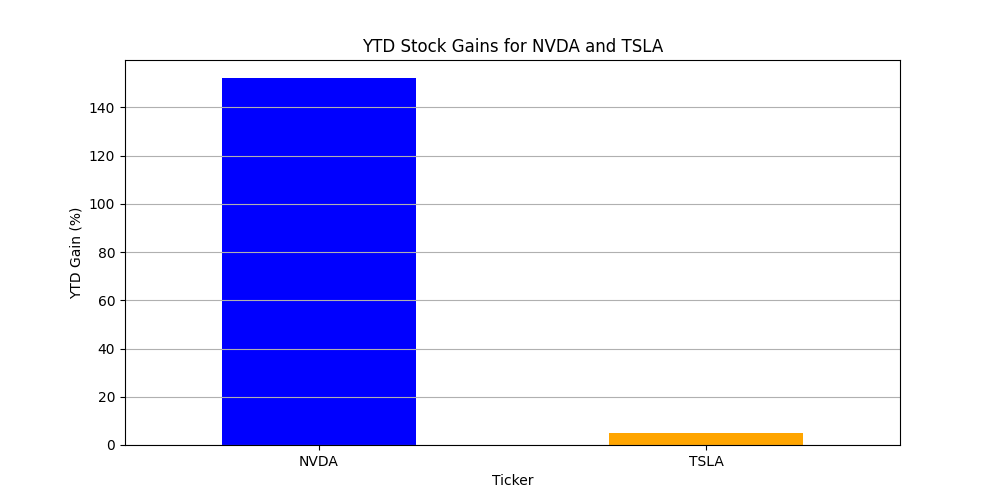

In [17]:
import os
from IPython.display import Image

Image(os.path.join("ytd_stock_gains.png"))

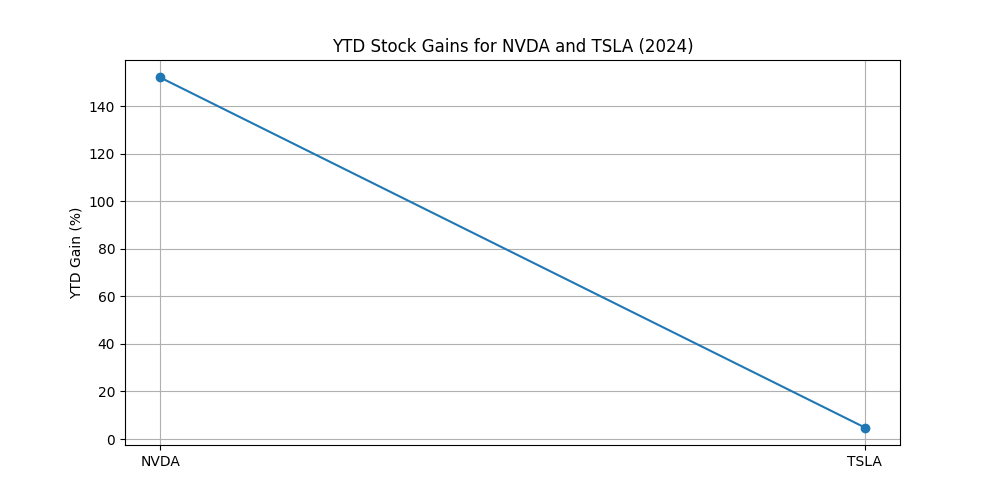

In [23]:
import os
from IPython.display import Image

Image(os.path.join("ytd_stock_gains.png"))

In [14]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [12]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

In [15]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [16]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [17]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [18]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

In [ ]:
import yfinance
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-10-05.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

```python
# filename: stock_prices_ytd.py
from functions import get_stock_prices, plot_stock_prices

stock_symbols = ['NVDA', 'TSLA']
start_date = '2024-01-01'
end_date = '2024-10-05'

stock_prices = get_stock_prices(stock_symbols, start_date, end_date)

plot_stock_prices(stock_prices, 'stock_prices_YTD_plot.png')
``` 

After executing this script in a Python environment where the necessary functions are available, it will download the stock prices year-to-date for NVDA and TSLA, create a plot of the stock prices, and save the plot as "stock_prices_YTD_plot.png" in the current directory.

Remember to have the functions `get_stock_pr

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: Traceback (most recent call last):
  File "D:\python_work\agent\coding\stock_prices_ytd.py", line 8, in <module>
    stock_prices = get_stock_prices(stock_symbols, start_date, end_date)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python_work\agent\coding\functions.py", line 19, in get_stock_prices
    import yfinance
ModuleNotFoundError: No module named 'yfinance'


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

It seems that the script requires the `yfinance` module to fetch stock prices, which is missing in your environment. You can install this module using pip. 

Please run the following command to install the `yfinance` module:

```sh
pip install yfi

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  debug


code_executor_agent (to code_writer_agent):

debug

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

We will debug the issue step by step. We will first check if the `yfinance` module is successfully installed in your Python environment. 

Let's check the installed packages in your Python environment by running the following command in the terminal:

```sh
pip list
```

Please execute this command and check if `yfinance` is listed among the installed packages. Let me know the output of this command so we can proceed with the debugging.

--------------------------------------------------------------------------------


Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  What is the Python environment you are in?


code_executor_agent (to code_writer_agent):

What is the Python environment you are in?

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

I'm an AI assistant running in a sandboxed environment with limited capabilities. I do not have a specific Python environment accessible to me. 

If you have any questions or need assistance with Python or any other programming-related tasks, feel free to ask, and I'll do my best to help you. 

If you encounter any issues or need further assistance with the `yfinance` module installation or any other programming task, please let me know, and I'll assist you accordingly.

--------------------------------------------------------------------------------


Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  yfinance                          0.2.43


code_executor_agent (to code_writer_agent):

yfinance                          0.2.43

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Since you have confirmed that the `yfinance` module is installed in your Python environment, we can proceed with executing the script to download the stock prices year-to-date for NVDA and TSLA.

Please rerun the Python script provided earlier to fetch the stock prices and create the plot for NVDA and TSLA.

```python
# filename: stock_prices_ytd.py
from functions import get_stock_prices, plot_stock_prices

stock_symbols = ['NVDA', 'TSLA']
start_date = '2024-01-01'
end_date = '2024-10-05'

stock_prices = get_stock_prices(stock_symbols, start_date, end_date)

plot_stock_prices(stock_prices, 'stock_prices_YTD_plot.png')
```

Run this script in a Python environment where the `functions` module with the necessary functionalities is available. Upon successful execution, the script 

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
code_executor_agent (to code_writer_agent):

exitcode: 1 (execution failed)
Code output: Traceback (most recent call last):
  File "D:\python_work\agent\coding\stock_prices_ytd.py", line 8, in <module>
    stock_prices = get_stock_prices(stock_symbols, start_date, end_date)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\python_work\agent\coding\functions.py", line 19, in get_stock_prices
    import yfinance
ModuleNotFoundError: No module named 'yfinance'


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

It seems like there's an issue with the script locating the `yfinance` module even though it's installed in your Python environment. One common reason for this error could be when the script is executed in a different environment where the install

In [33]:
import yfinance

In [ ]:
!pip list